### Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils import resample
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading the data

In [2]:
## Reading data from the csv file
data = pd.read_csv("machine_events.csv")
data.head()

,date,machine,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,1/1/2015,S1F01085,0,0,7,407438,215630672,6,0,52,56,0
1,1/1/2015,S1F0166B,0,3,0,403174,61370680,6,0,0,0,0
2,1/1/2015,S1F01E6Y,0,0,0,237394,173295968,12,0,0,0,0
3,1/1/2015,S1F01JE0,0,0,0,410186,79694024,6,0,0,0,0
4,1/1/2015,S1F01R2B,0,0,3,313173,135970480,15,0,0,0,0


In [3]:
## To check the number of observations and columns in the dataset.

data.shape

(124494, 12)

### Data Exploration 

In [4]:
data.describe()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,124494.000000,124494.000000,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,9.940455,12.451524,260172.858025,1.223868e+08,14.222693,0.292528,1.741120,159.484762,0.438792
std,0.029167,185.747321,191.425623,99151.009852,7.045960e+07,15.943021,7.436924,22.908507,2179.657730,11.155386
min,0.000000,0.000000,0.000000,8.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,221452.000000,6.127675e+07,8.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,249799.500000,1.227957e+08,10.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,310266.000000,1.833084e+08,12.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,24929.000000,18701.000000,689161.000000,2.441405e+08,98.000000,832.000000,1666.000000,64968.000000,1248.000000


### Checking the description about the dataframe

In [5]:
## Checking the description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      124494 non-null  object
 1   machine   124494 non-null  object
 2   event     124494 non-null  int64 
 3   feature1  124494 non-null  int64 
 4   feature2  124494 non-null  int64 
 5   feature3  124494 non-null  int64 
 6   feature4  124494 non-null  int64 
 7   feature5  124494 non-null  int64 
 8   feature6  124494 non-null  int64 
 9   feature7  124494 non-null  int64 
 10  feature8  124494 non-null  int64 
 11  feature9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
### Checking the value count of target variable (event)
data['event'].value_counts()

0    124388
1       106
Name: event, dtype: int64

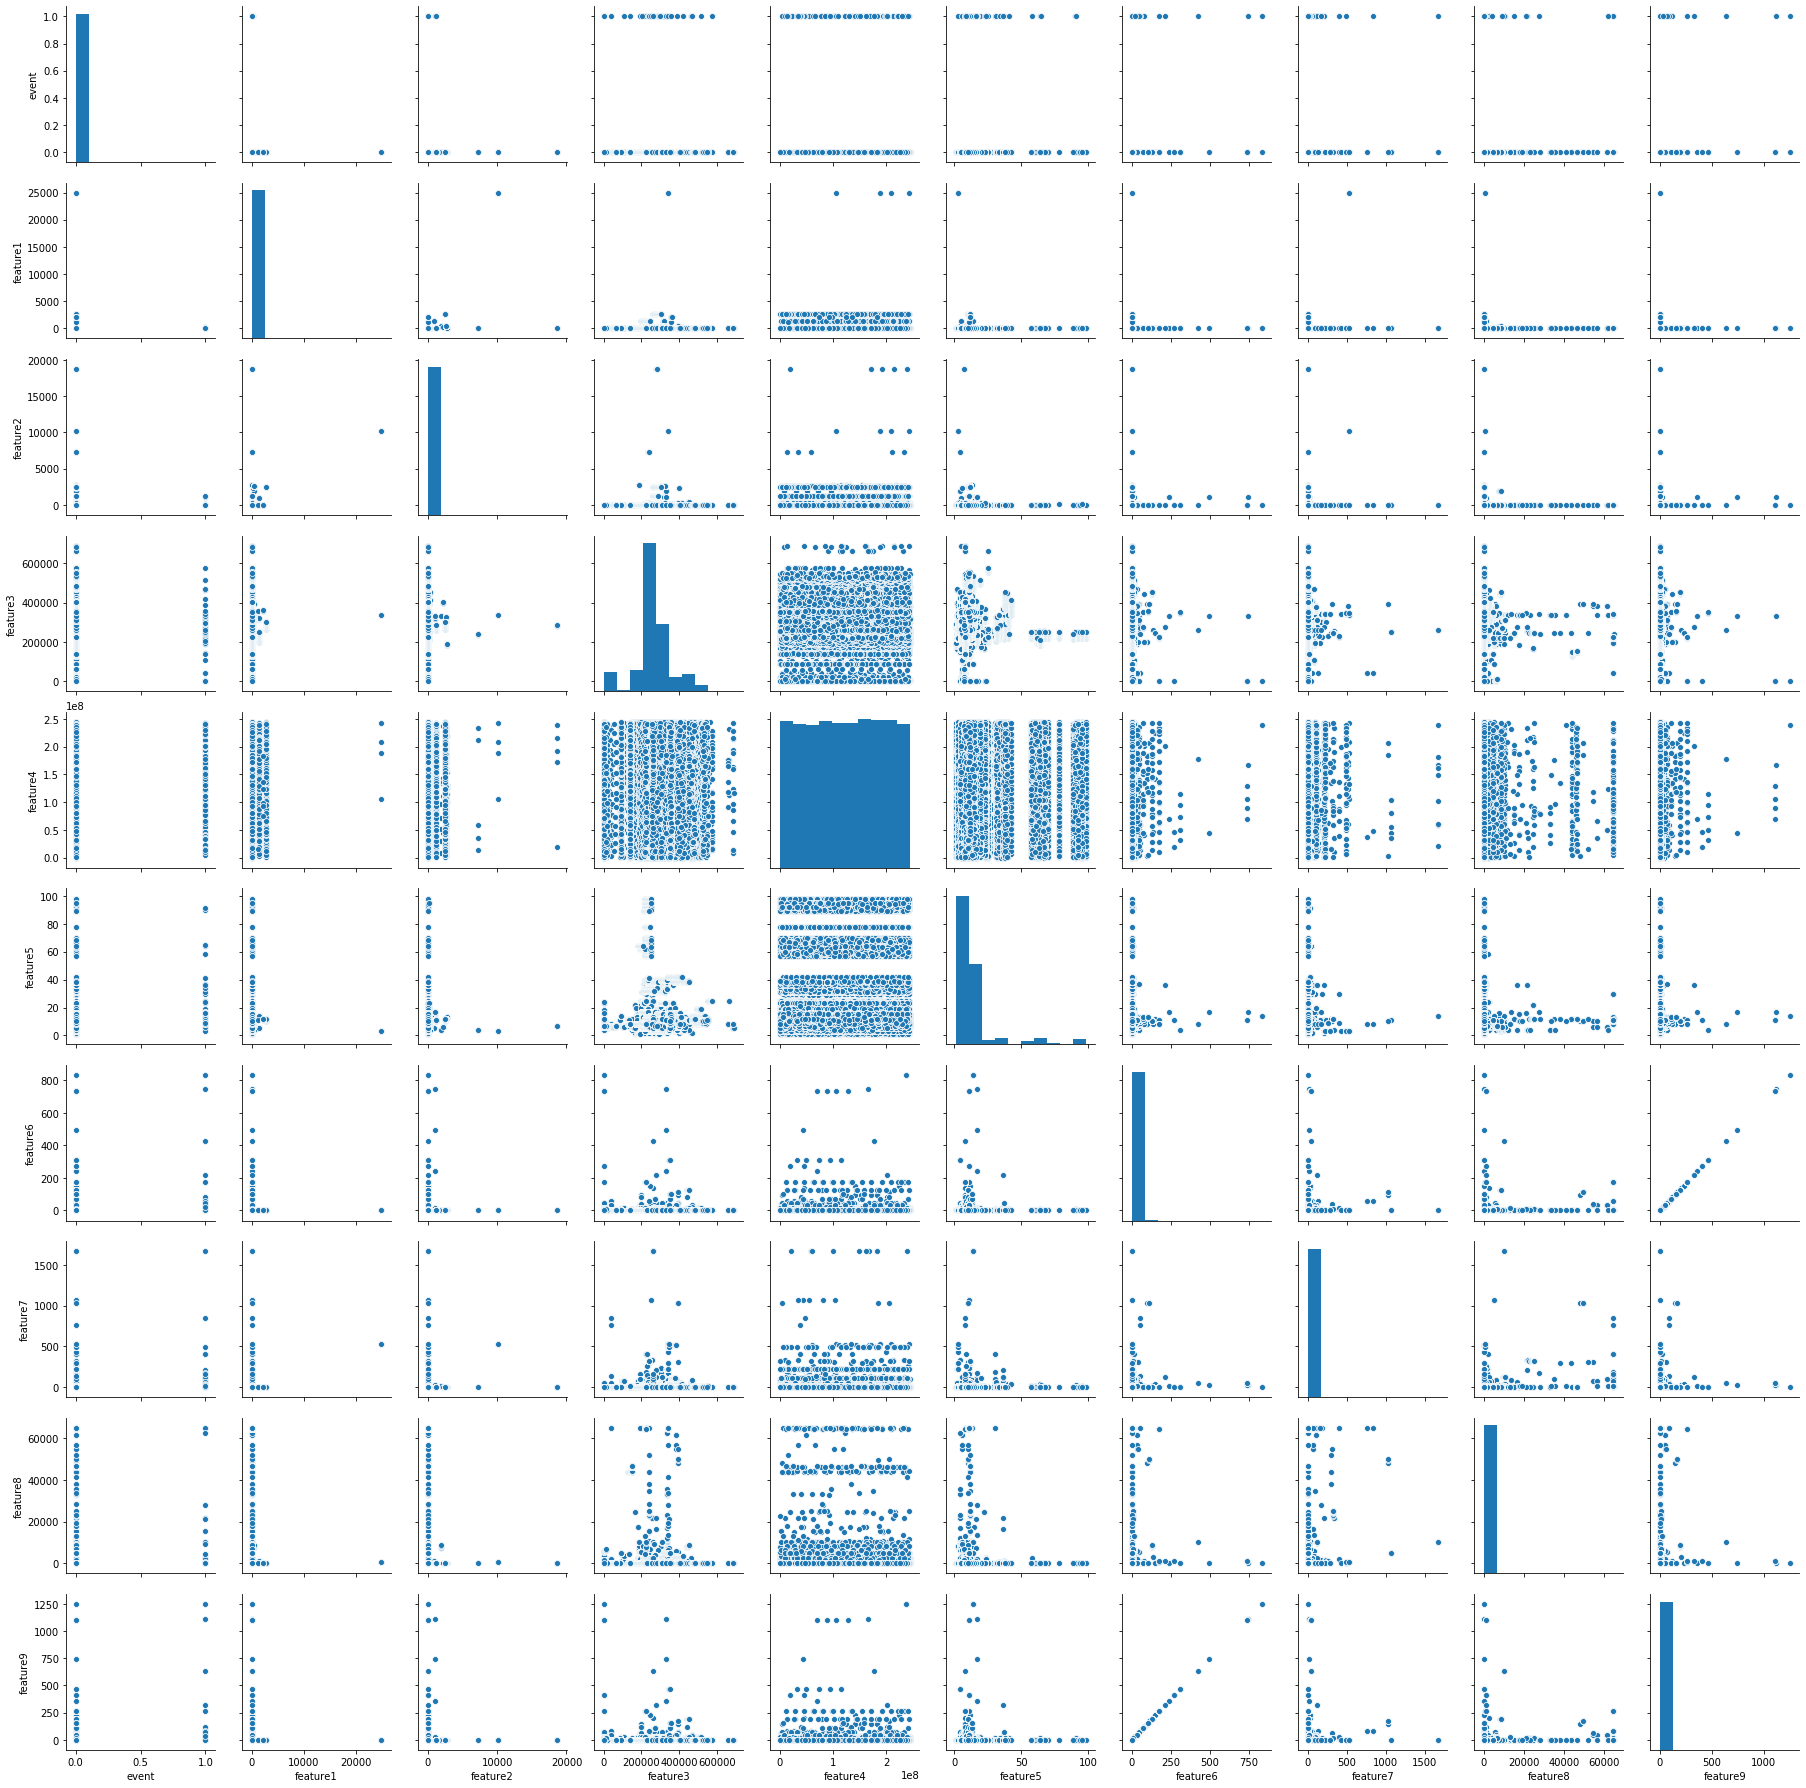

In [7]:
### To check the relationship between features.

sns.pairplot(data)

#### Summary of the above analysis

- From the above dataframe, we can see that there are no null values present. Also, columns date and machine belongs to object datatype and all other columns belongs to integer datatype.



- It is also clearly seen that the value count for event '1' is much less as compared to the event '0'. This leads to data imbalance.



- As we can see both "feature6" and "feature9" are highly correlated, I tried removing "feature9" to remove multicollinearity but there was no effect so I kept both the features.



- I have removed "date" and "machine" feature as it is not adding any value in the dataframe. Also, due to lack of domain knowledge and feature information, it is very difficult to do feature engineering.

In [8]:
### Taking the subset of the features by removing the date and machine columns from the dataframe.

data_overall = data[['event','feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9']]

#### Splitting the data into features and target variable. 


In [9]:
### x is consider as a feature variable and y as a target variable.

x = data_overall.drop('event',axis=1)
y = data_overall['event']

#### Scaling the data

Scaling of the data is done specifically for the KNN classification algorithm because in KNN the distance between the  feature values are measured and the scale or units of each feature is very different and that may leads to inaccurate classification by the model.

In [10]:
## Code for scaling

scale = x
scaled = scaler.fit_transform(scale)

In [11]:
### Splitting the data into train and test split after scaling

K_train, K_test, Kt_train, Kt_test = \
    train_test_split(scaled, y, test_size = 0.3, 
                     stratify=y, shuffle=True, random_state=999)

### Model fitting without UpScaling or DownScaling the dataset

### KNN Classifier

In [12]:
## Knn classifier
#from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=2, p=2)
knn_classifier.fit(K_train, Kt_train)

KNeighborsClassifier(n_neighbors=2)

In [13]:
## Confusion matrix 
confusion_matrix(Kt_test, knn_classifier.predict(K_test))

array([[37317,     0],
       [   32,     0]])

In [14]:
## Classification report 
print(classification_report(Kt_test, knn_classifier.predict(K_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
### Splitting the data into train and test split without scaling. 
## Scaling is not necessary for Logistic Regression and Decision Tree based models.

D_train, D_test, t_train, t_test = \
    train_test_split(x, y, test_size = 0.3, 
                     stratify=y, shuffle=True, random_state=999)

### Logistic Regression

In [16]:
### Logistic Regression
model = LogisticRegression(solver='liblinear', random_state=0)

In [17]:
## Fitting the model
model.fit(D_train, t_train)

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
## Confusion matrix 
confusion_matrix(t_test, model.predict(D_test))

array([[37317,     0],
       [   32,     0]])

In [19]:
## Classification report 
print(classification_report(t_test, model.predict(D_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.00      0.00      0.00        32

    accuracy                           1.00     37349
   macro avg       0.50      0.50      0.50     37349
weighted avg       1.00      1.00      1.00     37349



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [20]:
### Decision Tree Model 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(D_train, t_train)

In [21]:
## Confusion matrix 
confusion_matrix(t_test, clf.predict(D_test))

array([[37289,    28],
       [   31,     1]])

In [22]:
## Classification report 
print(classification_report(t_test, clf.predict(D_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.03      0.03      0.03        32

    accuracy                           1.00     37349
   macro avg       0.52      0.52      0.52     37349
weighted avg       1.00      1.00      1.00     37349



### UP SAMPLING

Up Sampling or oversampling involves randomly duplicating examples from the minority class and adding them to the dataset.

In [23]:
### Taking the subset of the features by removing the date and machine columns from the dataframe.
data_up = data[['event','feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9']]

In [24]:
### x is consider as a feature variable and y as a target variable.
x = data_up.drop('event',axis=1)
y = data_up['event']

In [25]:
### SMOTE (Synthetic Minority Oversampling Technique) is used for up sampling
X_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [26]:
### Displaying the value of both the dependent labels 
y_resampled.value_counts()

0    124388
1    124388
Name: event, dtype: int64

In [27]:
## Code for scaling
scaler = MinMaxScaler()
scale = X_resampled
scaled = scaler.fit_transform(scale)

In [28]:
### Splitting the data into train and test split
K_train, K_test, Kt_train, Kt_test = \
    train_test_split(scaled, y_resampled, test_size = 0.3, 
                     stratify=y_resampled, shuffle=True, random_state=999)

### KNN Classifier

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, p=2)
knn_classifier.fit(K_train, Kt_train)

KNeighborsClassifier(n_neighbors=2)

In [30]:
confusion_matrix(Kt_test, model.predict(K_test))

array([[37317,     0],
       [37316,     0]])

In [31]:
print(classification_report(Kt_test, model.predict(K_test)))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     37317
           1       0.00      0.00      0.00     37316

    accuracy                           0.50     74633
   macro avg       0.25      0.50      0.33     74633
weighted avg       0.25      0.50      0.33     74633



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
### Splitting the data into train and test split without scaling 
D_train, D_test, t_train, t_test = \
    train_test_split(X_resampled, y_resampled, test_size = 0.3, 
                     stratify=y_resampled, shuffle=True, random_state=999)

### Logistic Regression

In [33]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(D_train, t_train)

LogisticRegression(random_state=0, solver='liblinear')

In [34]:
confusion_matrix(t_test, model.predict(D_test))

array([[33992,  3325],
       [20103, 17213]])

In [35]:
print(classification_report(t_test, model.predict(D_test)))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74     37317
           1       0.84      0.46      0.60     37316

    accuracy                           0.69     74633
   macro avg       0.73      0.69      0.67     74633
weighted avg       0.73      0.69      0.67     74633



### Decision Tree

In [36]:
### Decision Tree Model 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(D_train, t_train)

In [37]:
confusion_matrix(t_test, clf.predict(D_test))

array([[37196,   121],
       [   67, 37249]])

In [38]:
print(classification_report(t_test, clf.predict(D_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       1.00      1.00      1.00     37316

    accuracy                           1.00     74633
   macro avg       1.00      1.00      1.00     74633
weighted avg       1.00      1.00      1.00     74633



#### DOWN SAMPLING 

In [39]:
### Taking the subset of the features by removing the date and machine columns from the dataframe.

data_down = data[['event','feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9']]

In [40]:
# Separate majority and minority classes
df_majority = data_down[data_down.event==0]
df_minority = data_down[data_down.event==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=106,     
                                 random_state=123) 
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.event.value_counts()

0    106
1    106
Name: event, dtype: int64

In [41]:
### Splitting the data into x and y variable
x = df_downsampled.drop('event',axis=1)
y = df_downsampled['event']

In [42]:
## Code for scaling
scaler = MinMaxScaler()
scale = x
scaled = scaler.fit_transform(scale)

In [43]:
### Splitting the data into train and test split

K_train, K_test, Kt_train, Kt_test = \
    train_test_split(scaled, y, test_size = 0.3, 
                     stratify=y, shuffle=True, random_state=999)

### KNN Classification

In [44]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [45]:
params_KNN = {'n_neighbors': [2], 
              'p': [2]}

In [46]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='f1', 
                      return_train_score=True)

In [47]:
gs_KNN.fit(scaled, y); # Note that the input here is the full scaled tranining and test data

Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished


In [48]:
gs_KNN.best_score_

0.40512998831754854

### Applying KNN using best features in downsampling

In [49]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, p=2)
knn_classifier.fit(K_train, Kt_train)
print(classification_report(Kt_test, model.predict(K_test)))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.92      0.75      0.83        32

    accuracy                           0.84        64
   macro avg       0.86      0.84      0.84        64
weighted avg       0.86      0.84      0.84        64



In [50]:
confusion_matrix(Kt_test, model.predict(K_test))

array([[30,  2],
       [ 8, 24]])

### Logistic Regression

In [51]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [52]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [53]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, scoring='f1')

In [54]:
# Fit grid search
best_model = clf.fit(x, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

In [55]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [56]:
clf.best_score_

0.5741543513957306

### Applying Logistic Regression using best features in downsampling

In [57]:
### default value of C is '1.0', and penalty is 'l2'
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(D_train, t_train)
confusion_matrix(t_test, model.predict(D_test))

array([[33992,  3325],
       [20103, 17213]])

In [58]:
print(classification_report(t_test, model.predict(D_test)))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74     37317
           1       0.84      0.46      0.60     37316

    accuracy                           0.69     74633
   macro avg       0.73      0.69      0.67     74633
weighted avg       0.73      0.69      0.67     74633



In [59]:
confusion_matrix(t_test, model.predict(D_test))

array([[33992,  3325],
       [20103, 17213]])

### Decision Tree

In [60]:
param_dict = {
    "criterion":['gini', 'entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_split":range(1,5)
}

In [61]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                   param_grid=param_dict,
                   cv=5,
                   verbose=1,
                   n_jobs=-1,
                   scoring='f1')

grid.fit(x,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_split': range(1, 5)},
             scoring='f1', verbose=1)

In [62]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [63]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [64]:
grid.best_score_

0.8213450292397659

### Applying Decision Tree using best features in downsampling

In [65]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
clf = clf.fit(D_train, t_train)

In [66]:
confusion_matrix(t_test, clf.predict(D_test))

array([[32958,  4359],
       [ 2017, 35299]])

In [67]:
print(classification_report(t_test, clf.predict(D_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     37317
           1       0.89      0.95      0.92     37316

    accuracy                           0.91     74633
   macro avg       0.92      0.91      0.91     74633
weighted avg       0.92      0.91      0.91     74633



### ** EXIT **